#### MultiLinear Regression
Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn 

Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [65]:
X = data.iloc[:,0:4].values
Y = data.iloc[:,-1].values

In [66]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X[:,3] = lb.fit_transform(X[:,3])

In [67]:
x = """
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore')
X[:,3] = oh.fit_transform(X[:,3].reshape(-1, 1))
"""

In [68]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X = sd.fit_transform(X)

In [69]:
X[0]

array([2.01641149, 0.56075291, 2.15394309, 1.21267813])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size=0.20 , random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
k = model.predict([[2.01641149, 0.56075291, 2.15394309, 1.21267813]])
k

array([192405.36713789])

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print("MSE = ",mse)
print("MAE = ",mae)
print("R2 = ",r2)

MSE =  80929465.49099012
MAE =  6979.175746721795
R2 =  0.8866440012122881


Text(0, 0.5, 'Salary')

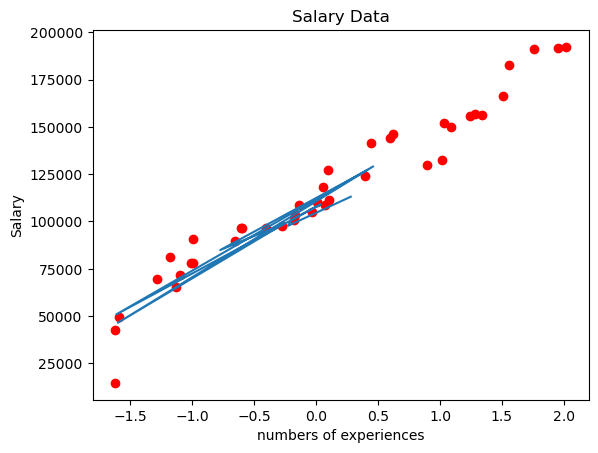

In [55]:
plt.scatter(X_train[:,0],y_train,c="red")
plt.plot(X_test[:,0],y_pred)
plt.title("Salary Data")
plt.xlabel("numbers of experiences")
plt.ylabel("Salary")

In [ ]:
# BackwordElimination
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((50, 1)), values=X, axis=1)
x_opt = X[:, [0, 1, 2, 3, 4]]
mod = sm.OLS(endog=Y, exog=x_opt).fit()
mod.summary()